# Linear Classification

In [1]:
# basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# machine learning
from sklearn.datasets import make_blobs, make_circles
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# helper function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [3]:
# helper function to convert numpy (two column) X and y to a pandas df
# useful for printing and plotting
def numpy_to_df(X, y):
    df = pd.DataFrame(
        {
            "x1": X[:, 0],
            "x2": X[:, 1],
            "y": y,
        }
    )
    return df

In [4]:
# helper function to create a custom decision region plot
def plot_decision_regions(mod, X, y):

    # define colors for points
    illini_cmap = ListedColormap(
        [
            "#1D58A7",  # illini industrial blue
            "#FF5F05",  # illini orange
        ]
    )

    # define colors for decision regions
    light_illini_cmap = ListedColormap(
        [
            "#BFC9D9",  # illini industrial blue (lighter)
            "#FCCFB5",  # a lighter orange
        ]
    )

    # create figure and axes
    _, ax = plt.subplots(figsize=(8, 6))

    # start with sklearn default plot
    DecisionBoundaryDisplay.from_estimator(
        mod,
        X,
        cmap=light_illini_cmap,
        ax=ax,
        grid_resolution=1000,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        xlabel="$x_1$",
        ylabel="$x_2$",
    )

    # add points to plot
    for i, shape in enumerate(["o", "s"]):
        mask = y == i
        ax.scatter(
            X[mask, 0],
            X[mask, 1],
            color=illini_cmap(i),
            edgecolors="white",
            linewidth=1,
            marker=shape,
            label=f"Class {i}",
        )

    # add title and legend
    _ = ax.set_title("Logistic Regression Decision Boundary")
    _ = ax.legend(loc="best")

## Blob Data

In [5]:
# make and split "blob" data for classification
X, y = make_blobs(
    n_samples=200,
    centers=2,
    cluster_std=3.5,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [6]:
# temporarily create df for easy plotting and printing
train_df = numpy_to_df(X_train, y_train)
train_df

,x1,x2,y
0,6.824298,4.172379,1
1,5.774461,1.517669,1
2,-6.381370,4.827563,0
3,-3.328734,8.194807,0
4,-5.338925,7.258136,0
...,...,...,...
95,9.209055,2.046683,1
96,-4.363358,10.810722,0
97,8.052798,1.458469,1
98,-4.611433,7.993358,0


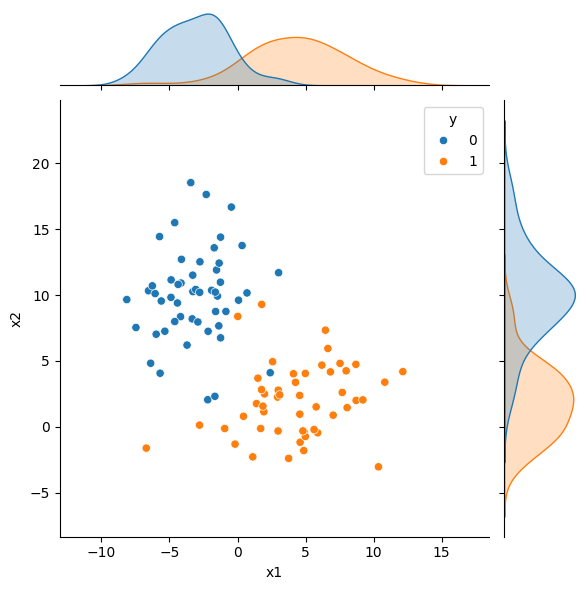

In [7]:
# (quickly) create a "joint" plot
_ = sns.jointplot(data=train_df, x="x1", y="x2", hue="y")

In [8]:
# initialize and fit logistic regression
logistic = LogisticRegression(penalty=None)
_ = logistic.fit(X_train, y_train)

In [9]:
# estimated coefficients
logistic.intercept_, logistic.coef_

(array([3.23190297]), array([[ 0.68741802, -0.60292869]]))

In [10]:
# estimated conditional probabilities (first 10 samples from test set)
np.round(logistic.predict_proba(X_test)[range(10)], 3)

array([[0.   , 1.   ],
       [0.   , 1.   ],
       [0.348, 0.652],
       [0.997, 0.003],
       [0.848, 0.152],
       [0.   , 1.   ],
       [0.941, 0.059],
       [0.   , 1.   ],
       [0.999, 0.001],
       [0.069, 0.931]])

In [11]:
# predictions (classifications) on the test data
logistic.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [12]:
# train accuracy
accuracy(y_train, logistic.predict(X_train))

np.float64(0.94)

In [13]:
# test accuracy
accuracy(y_test, logistic.predict(X_test))

np.float64(0.89)

In [14]:
# create "second order" features (without bias/intercept, it will be "added" later)
poly = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
# "learn" the transformation then apply it to the train and test data
_ = poly.fit(X_train)
X_train_trans = poly.transform(X_train)
X_test_trans = poly.transform(X_test)

In [16]:
# initialize and fit logistic regression with higher order terms
logistic_higher = LogisticRegression(penalty=None)
_ = logistic_higher.fit(X_train_trans, y_train)

In [17]:
# estimated coefficients
logistic_higher.intercept_, logistic_higher.coef_

(array([3.10539347]),
 array([[ 0.6710299 , -0.86677825,  0.02586866,  0.03850782,  0.02554295]]))

In [18]:
# train accuracy (higher!)
accuracy(y_train, logistic_higher.predict(X_train_trans))

np.float64(0.95)

In [19]:
# test accuracy (lower!)
accuracy(y_test, logistic_higher.predict(X_test_trans))

np.float64(0.91)

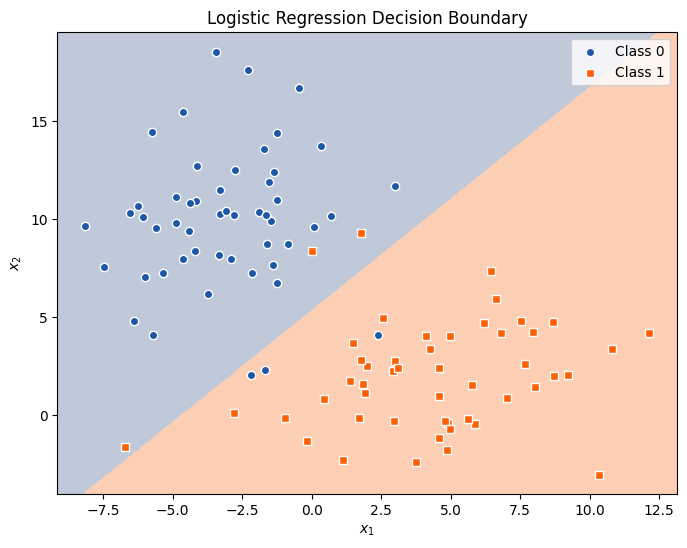

In [20]:
# plot decision region for initial model
plot_decision_regions(logistic, X_train, y_train)

In [21]:
# refit the higher-order model using a pipeline, will be helpful for plotting decision boundary
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("logistic", LogisticRegression()),
    ]
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('logistic', LogisticRegression())])

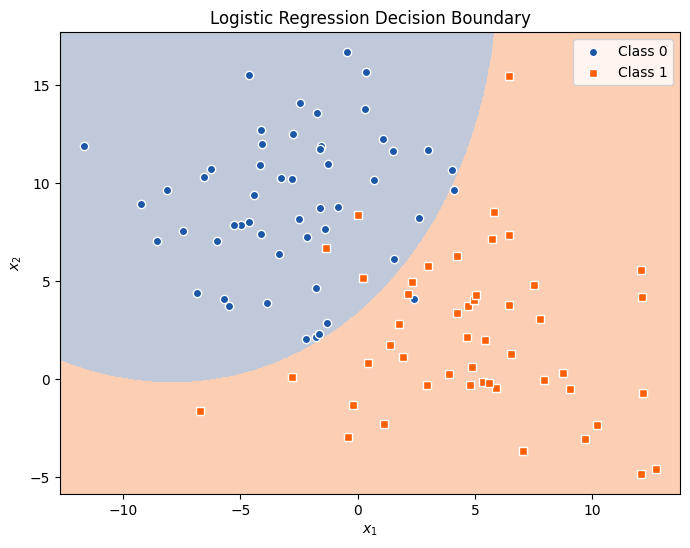

In [22]:
# plot decision region for higher-order model
plot_decision_regions(pipeline, X_train, y_train)

## Circle Data

In [23]:
# make and split "circle" data for classification
X, y = make_circles(
    n_samples=200,
    random_state=42,
    noise=0.05,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [24]:
# temporarily create df for easy plotting
train_df = numpy_to_df(X_train, y_train)

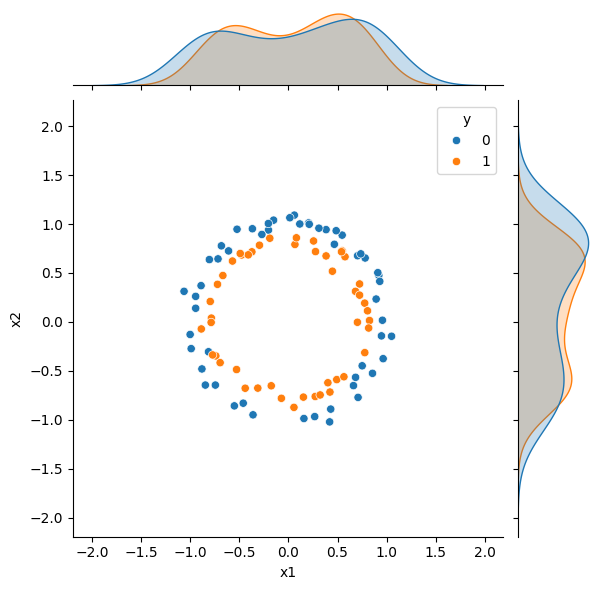

In [25]:
# (quickly) create a "joint" plot
_ = sns.jointplot(data=train_df, x="x1", y="x2", hue="y")

In [26]:
# initialize and fit logistic regression
logistic = LogisticRegression()
_ = logistic.fit(X_train, y_train)

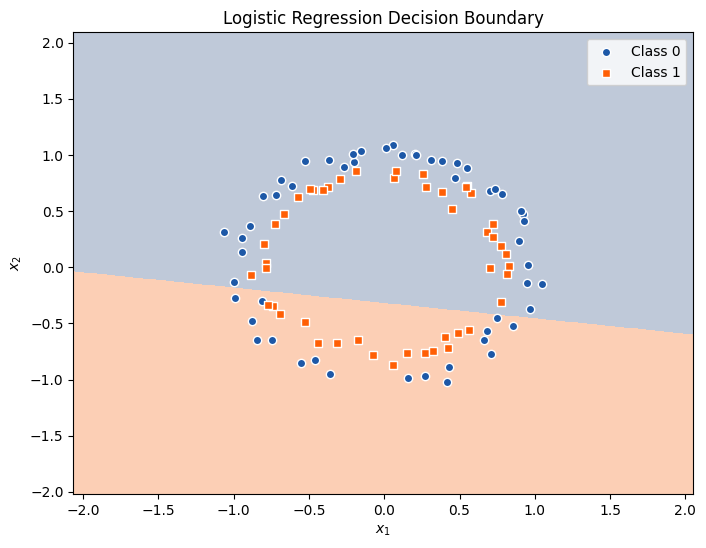

In [27]:
# plot decision region for initial model
plot_decision_regions(logistic, X_train, y_train)

In [28]:
# fit a higher-order model using a pipeline
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("logistic", LogisticRegression(penalty=None)),
    ]
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('logistic', LogisticRegression(penalty=None))])

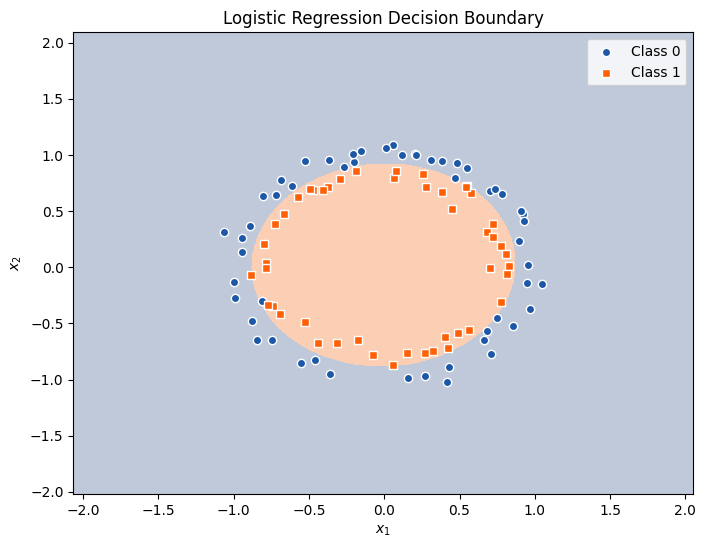

In [29]:
# plot decision region for higher-order model
plot_decision_regions(pipeline, X_train, y_train)